In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
!pip install -q kaggle
!mkdir -p ~/.kaggle

# Upload Kaggle API key file (might have to rerun to work)
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhavya3022","key":"2992df84ea05ee2ee82f65d6ab8666b2"}'}

In [3]:
# Download our dataset
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

# Unzip it
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [4]:
df = pd.read_csv('hmnist_28_28_RGB.csv')
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [5]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [6]:
df['label'].unique()
df.shape

(10015, 2353)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [8]:
# classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
#          1:('bcc' , 'basal cell carcinoma'),
#          2:('bkl', 'benign keratosis-like lesions'),
#          3:('df', 'dermatofibroma'),
#          4:('nv', ' melanocytic nevi'),
#          5:('vasc', ' pyogenic granulomas and hemorrhage'),
#          6:('mel', 'melanoma'),}

In [9]:
Label = df["label"]
Data = df.drop(columns=["label"])
df["label"].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [10]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
Data, Label  = oversample.fit_resample(Data, Label)
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)

Shape of Data : (46935, 28, 28, 3)


In [11]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

Train test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(35201,)
(11734, 28, 28, 3)
(11734,)


In [14]:
!pip install keras-utils
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=42315f7b01e9b3bed496438ad553e631aec7ae1984a1ea46196c6f7eecea56d2
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


In [15]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
datagen = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)

testgen = ImageDataGenerator(rescale=(1./255))

In [16]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

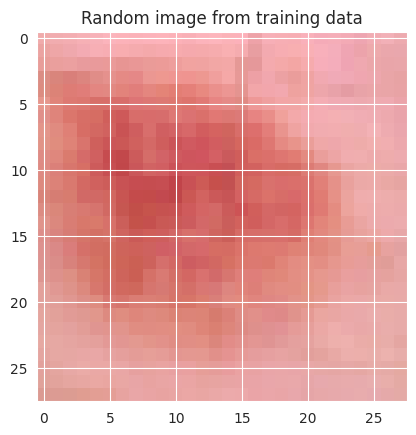

In [17]:
import matplotlib.pyplot as plt
import random
num = random.randint(0,8000)
x_train = np.array(X_train , dtype = np.uint8).reshape(-1,28,28,3)

# Random image generation 1
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

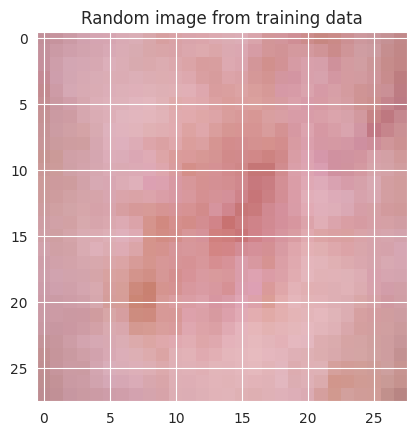

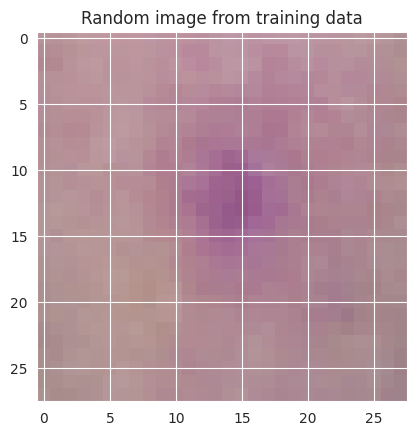

In [18]:
# Random image generation 2
num = random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Random image generation 3
num = random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()


Build CNN Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , Dense,MaxPool2D
import tensorflow as tf
import keras

In [20]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

In [21]:
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0

In [22]:
history = model.fit(X_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25
276/276 [==============================] - 257s 915ms/step - loss: 1.2300 - accuracy: 0.5564 - val_loss: 0.9040 - val_accuracy: 0.6779 - lr: 0.0010
Epoch 2/25
276/276 [==============================] - 227s 824ms/step - loss: 0.5380 - accuracy: 0.8206 - val_loss: 0.4260 - val_accuracy: 0.8522 - lr: 0.0010
Epoch 3/25
276/276 [==============================] - 231s 839ms/step - loss: 0.3069 - accuracy: 0.8968 - val_loss: 0.2650 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 4/25
276/276 [==============================] - 233s 845ms/step - loss: 0.2141 - accuracy: 0.9263 - val_loss: 0.2234 - val_accuracy: 0.9166 - lr: 0.0010
Epoch 5/25
276/276 [==============================] - 231s 837ms/step - loss: 0.1550 - accuracy: 0.9465 - val_loss: 0.1867 - val_accuracy: 0.9326 - lr: 0.0010
Epoch 6/25
276/276 [==============================] - 232s 841ms/step - loss: 0.1111 - accuracy: 0.9622 - val_loss: 0.1327 - val_accuracy: 0.9570 - lr: 0.0010
Epoch 7/25
276/276 [==========================

In [23]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

367/367 [==============================] - 18s 49ms/step - loss: 0.0625 - accuracy: 0.9851
Train Loss:  0.0002165553014492616
Train Accuracy:  1.0
--------------------
Test Loss:  0.06253485381603241
Test Accuracy:  0.9850860834121704


In [28]:
# y_true = np.array(y_test)
# y_pred = model.predict(X_test)

# y_pred = np.argmax(y_pred , axis=1)
# y_true = np.argmax(y_true , axis=1)

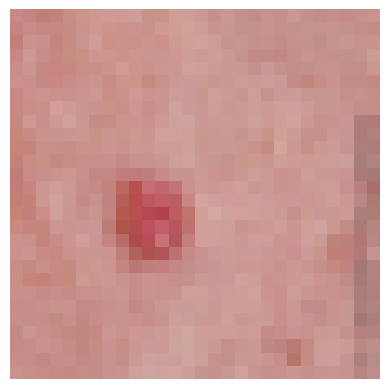

1/1 [==============================] - 1s 507ms/step
[5.2421459e-04 7.5974727e-01 2.0734921e-02 1.3195328e-02 4.5285594e-02
 1.5968198e-01 8.3069282e-04]
('bcc', ' basal cell carcinoma')


In [27]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO  # Import BytesIO

# Define the URL of the image you want to load
image_url = "https://m4b6f3p8.rocketcdn.me/app/uploads/2021/04/basalCellCarcinomaBCC_6163_lg.jpg"

# Load the image from the URL
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))  # Use BytesIO to read the content
image = image.resize((28, 28))

# Convert the image to a NumPy array
img = np.array(image)

# Reshape the array if needed
# img = img.reshape(-1, 28, 28, 3)  # Uncomment this line if needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Rest of your code
# img = X_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])


In [ ]:
import pickle

with open("projectname.pickle", 'wb') as file:
    pickle.dump(model, file)

: 